In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing import image

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
seed = 42
rng = np.random.RandomState(seed)

In [3]:
data = pd.read_csv('../datasets/emergency_classification/emergency_classification.csv')

In [4]:
X = []
for img_name in data.image_names:
    img = plt.imread('../datasets/emergency_classification/images/' + img_name)
    X.append(img)
    
X = np.array(X)

y = data.emergency_or_not.values

In [5]:
X = X.reshape(2352, 224*224*3)

In [6]:
X = X / X.max()

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=seed)

In [8]:
model = Sequential()

model.add(Dense(100, input_dim=224*224*3, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_valid, y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 4s 3ms/step - loss: 0.8251 - acc: 0.5583 - val_loss: 0.6566 - val_acc: 0.5992
Epoch 2/10
1646/1646 [==============================] - 3s 2ms/step - loss: 0.6498 - acc: 0.6124 - val_loss: 0.6352 - val_acc: 0.6572
Epoch 3/10
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6374 - acc: 0.6452 - val_loss: 0.6234 - val_acc: 0.6516
Epoch 4/10
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6175 - acc: 0.6786 - val_loss: 0.6099 - val_acc: 0.6686
Epoch 5/10
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6061 - acc: 0.6707 - val_loss: 0.6155 - val_acc: 0.6601
Epoch 6/10
1646/1646 [==============================] - 2s 2ms/step - loss: 0.6023 - acc: 0.6920 - val_loss: 0.6027 - val_acc: 0.6544
Epoch 7/10
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6010 - acc: 0.6896 - val_loss: 0.6190 - val_acc: 0.6558
Epoch 8/10
1646

61 % sure that it is emergency
whereas actual class is 0


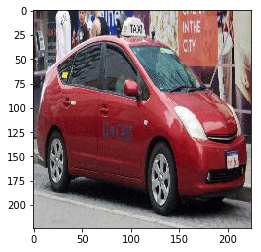

In [11]:
# get predictions
predictions = model.predict_classes(X_valid)[:, 0]
prediction_probabilities = model.predict(X_valid)[:, 0]

# pull out the original images from the data which correspond to validation data
_, valid_vehicles, _, valid_y = train_test_split(data.image_names.values, y, test_size=0.3, random_state=seed)

# get a random index to plot image randomly 
index = rng.choice(range(len(valid_vehicles)))

# get the corresponding image name and probability
img_name = valid_vehicles[index]
prob = (prediction_probabilities * 100).astype(int)[index]

# read the image
img = plt.imread('../datasets/emergency_classification/images/' + img_name)

# print the probability and actual class
print(prob, '% sure that it is emergency')
print('whereas actual class is', valid_y[index])

# plot the image
plt.imshow(img)

In [12]:
incorrect_indices = np.where(predictions != y_valid)[0]

In [13]:
len(incorrect_indices), predictions.shape

(224, (706,))

48 % sure that it is emergency
whereas actual class is 1


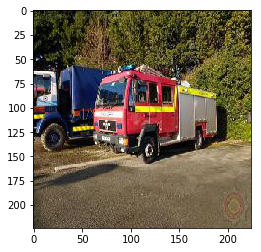

In [14]:
index = rng.choice(incorrect_indices)
img_name = valid_vehicles[index]

prob = (prediction_probabilities * 100).astype(int)[index]

img = plt.imread('../datasets/emergency_classification/images/' + img_name)

print(prob, '% sure that it is emergency')
print('whereas actual class is', y_valid[index])

plt.imshow(img)

Weights of Neural Network -----> Parameter

Activation Function       -----> HyperParameter

In [15]:
# change activation function of hidden layer
# increase hidden neurons
# increase hidden layers
# increase number of epochs
# change optimizer

In [38]:
model = Sequential()

model.add(Dense(100, input_dim=224*224*3, activation='tanh'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_valid, y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 3s 2ms/step - loss: 2.9291 - acc: 0.5650 - val_loss: 1.7220 - val_acc: 0.5609
Epoch 2/10
1646/1646 [==============================] - 3s 2ms/step - loss: 0.9584 - acc: 0.5863 - val_loss: 0.6975 - val_acc: 0.5609
Epoch 3/10
1646/1646 [==============================] - 3s 2ms/step - loss: 0.6788 - acc: 0.5863 - val_loss: 0.6858 - val_acc: 0.5609
Epoch 4/10
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6778 - acc: 0.5863 - val_loss: 0.6817 - val_acc: 0.5609
Epoch 5/10
1646/1646 [==============================] - 3s 2ms/step - loss: 0.6731 - acc: 0.5863 - val_loss: 0.6748 - val_acc: 0.5609
Epoch 6/10
1646/1646 [==============================] - 3s 2ms/step - loss: 0.6594 - acc: 0.5820 - val_loss: 0.6645 - val_acc: 0.5722
Epoch 7/10
1646/1646 [==============================] - 3s 2ms/step - loss: 0.6560 - acc: 0.6063 - val_loss: 0.6707 - val_acc: 0.5609
Epoch 8/10
1646

In [39]:
model = Sequential()

model.add(Dense(1024, input_dim=224*224*3, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_valid, y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 5s 3ms/step - loss: 1.6417 - acc: 0.5043 - val_loss: 0.8539 - val_acc: 0.5609
Epoch 2/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.7086 - acc: 0.5936 - val_loss: 0.6277 - val_acc: 0.6530
Epoch 3/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6475 - acc: 0.6288 - val_loss: 0.6417 - val_acc: 0.6161
Epoch 4/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6120 - acc: 0.6683 - val_loss: 0.6218 - val_acc: 0.6445
Epoch 5/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6469 - acc: 0.6464 - val_loss: 0.5935 - val_acc: 0.6884
Epoch 6/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6266 - acc: 0.6458 - val_loss: 0.6128 - val_acc: 0.6516
Epoch 7/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.5928 - acc: 0.6920 - val_loss: 0.6569 - val_acc: 0.6076
Epoch 8/10
1646

In [40]:
model = Sequential()

model.add(Dense(1024, input_dim=224*224*3, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_valid, y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/50
1646/1646 [==============================] - 5s 3ms/step - loss: 1.3828 - acc: 0.5498 - val_loss: 0.7623 - val_acc: 0.4632
Epoch 2/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.7427 - acc: 0.6009 - val_loss: 0.6447 - val_acc: 0.6147
Epoch 3/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6972 - acc: 0.5954 - val_loss: 0.6106 - val_acc: 0.6742
Epoch 4/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6153 - acc: 0.6640 - val_loss: 0.6013 - val_acc: 0.6742
Epoch 5/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6146 - acc: 0.6683 - val_loss: 0.5937 - val_acc: 0.6756
Epoch 6/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6398 - acc: 0.6555 - val_loss: 0.6380 - val_acc: 0.6331
Epoch 7/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6005 - acc: 0.6792 - val_loss: 0.5977 - val_acc: 0.6756
Epoch 8/50
1646

In [42]:
model = Sequential()

model.add(Dense(1024, input_dim=224*224*3, activation='sigmoid'))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_valid, y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/50
1646/1646 [==============================] - 5s 3ms/step - loss: 0.6743 - acc: 0.5814 - val_loss: 0.6901 - val_acc: 0.5609
Epoch 2/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6626 - acc: 0.5905 - val_loss: 0.6601 - val_acc: 0.5694
Epoch 3/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6517 - acc: 0.6245 - val_loss: 0.6546 - val_acc: 0.5822
Epoch 4/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6495 - acc: 0.6245 - val_loss: 0.6434 - val_acc: 0.6586
Epoch 5/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6369 - acc: 0.6476 - val_loss: 0.6355 - val_acc: 0.6643
Epoch 6/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6321 - acc: 0.6501 - val_loss: 0.6328 - val_acc: 0.6459
Epoch 7/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6259 - acc: 0.6725 - val_loss: 0.6278 - val_acc: 0.6516
Epoch 8/50
1646

In [16]:
from keras.optimizers import Adam

In [17]:
adam = Adam(lr=1e-5)

In [18]:
model = Sequential()

model.add(Dense(1024, input_dim=224*224*3, activation='sigmoid'))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_valid, y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/50
1646/1646 [==============================] - 5s 3ms/step - loss: 0.6764 - acc: 0.5832 - val_loss: 0.6305 - val_acc: 0.6671
Epoch 2/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6213 - acc: 0.6622 - val_loss: 0.6117 - val_acc: 0.6700
Epoch 3/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.5940 - acc: 0.7011 - val_loss: 0.5853 - val_acc: 0.6941
Epoch 4/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.5772 - acc: 0.7084 - val_loss: 0.5795 - val_acc: 0.7068
Epoch 5/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.5583 - acc: 0.7303 - val_loss: 0.5882 - val_acc: 0.6771
Epoch 6/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.5484 - acc: 0.7333 - val_loss: 0.5714 - val_acc: 0.6870
Epoch 7/50
1646/1646 [==============================] - 3s 2ms/step - loss: 0.5481 - acc: 0.7260 - val_loss: 0.5603 - val_acc: 0.6969
Epoch 8/50
1646